# Task 1: Describe the Dataset

## Data Understanding
Goal: Understand the structure and basic properties of the dataset using Python (NumPy, pandas, Matplotlib/Seaborn).

1) Read the CSV file with pandas.read_csv and parse the datetime
column.

In [32]:
import pandas as pd

day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])
hour["datetime"] = hour["dteday"] + pd.to_timedelta(hour["hr"], unit="h")

df_pre = pd.merge(
    hour,
    day,
    on="dteday",
    how="left",
    suffixes=("_hour", "_day")
)

df = pd.DataFrame(
    {
        "datetime": df_pre["datetime"],
        "target": df_pre["cnt_hour"],
        "weather": df_pre["weathersit_hour"],
        "temp": df_pre["temp_hour"],
        "humidity": df_pre["hum_hour"],
        "windspeed": df_pre["windspeed_hour"],
        "season": df_pre["season_day"],
        "day_of_week": df_pre["weekday_day"],
        "is_holiday": df_pre["holiday_day"],
        "is_workingday": df_pre["workingday_day"]
    }
)

2. Report:
- Number of rows and columns.
- Time range covered by the data.
- Target variable and list of feature variables (names and data types).

In [33]:

def dataframe_report(df: pd.DataFrame, target_col: str, time_col: str):
    print("=== DATAFRAME REPORT ===\n")

    # Rows & Columns
    n_rows, n_cols = df.shape
    print(f"Number of rows: {n_rows}")
    print(f"Number of columns: {n_cols}\n")

    # Time range
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
    start_date = df[time_col].min()
    end_date = df[time_col].max()
    print(f"Time range covered: {start_date} → {end_date}\n")

    # Target variable
    print("Target variable:")
    print(f"  - {target_col} ({df[target_col].dtype})\n")

    # Feature variables
    feature_cols = [col for col in df.columns if col not in [target_col, time_col]]
    print("Feature variables:")
    for col in feature_cols:
        print(f"  - {col}: {df[col].dtype}")

# Beispiel-Aufruf
dataframe_report(
    df=df,
    target_col="target",
    time_col="datetime"
)

=== DATAFRAME REPORT ===

Number of rows: 17379
Number of columns: 10

Time range covered: 2011-01-01 00:00:00 → 2012-12-31 23:00:00

Target variable:
  - target (int64)

Feature variables:
  - weather: int64
  - temp: float64
  - humidity: float64
  - windspeed: float64
  - season: int64
  - day_of_week: int64
  - is_holiday: int64
  - is_workingday: int64


3. Create a variable description table (see above for reference).

In [34]:
def create_variable_description_table(
    df: pd.DataFrame,
    target_col: str,
    time_col: str
) -> pd.DataFrame:

    rows = []

    for col in df.columns:
        if col == time_col:
            role = "time"
        elif col == target_col:
            role = "target"
        else:
            role = "feature"

        rows.append({
            "variable_name": col,
            "role": role,
            "data_type": df[col].dtype.name,
        })

    return pd.DataFrame(rows)

# Example usage
var_table = create_variable_description_table(
    df=df,
    target_col="target",
    time_col="datetime"
)

var_table

,variable_name,role,data_type
0,datetime,time,datetime64[ns]
1,target,target,int64
2,weather,feature,int64
3,temp,feature,float64
4,humidity,feature,float64
5,windspeed,feature,float64
6,season,feature,int64
7,day_of_week,feature,int64
8,is_holiday,feature,int64
9,is_workingday,feature,int64


4. Check for:
- Missing values per column.
- Duplicated rows (if any).

In [35]:
print(f'Number of duplicate rows: {df.duplicated().sum()}')
print(f'Number of missing values: {df.isnull().sum().sum()}')

Number of duplicate rows: 0
Number of missing values: 0


## Descriptive statistics:

For numeric variables: calculate mean, standard deviation, minimum, maximum, and quartiles.

In [36]:
df[["target","temp","humidity","windspeed"]].describe()

,target,temp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,189.463088,0.496987,0.627229,0.190098
std,181.387599,0.192556,0.192930,0.122340
min,1.000000,0.020000,0.000000,0.000000
25%,40.000000,0.340000,0.480000,0.104500
50%,142.000000,0.500000,0.630000,0.194000
75%,281.000000,0.660000,0.780000,0.253700
max,977.000000,1.000000,1.000000,0.850700


For categorical variables: show frequency tables or bar charts

In [37]:
categorical_cols = ["weather", "season", "is_holiday", "is_workingday"]

for col in categorical_cols:
    print(df[col].value_counts(), end="\n\n")


weather
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

is_holiday
0    16879
1      500
Name: count, dtype: int64

is_workingday
1    11865
0     5514
Name: count, dtype: int64



## Visualisation

Plot the time series of total bike demand (count) over the full
period.

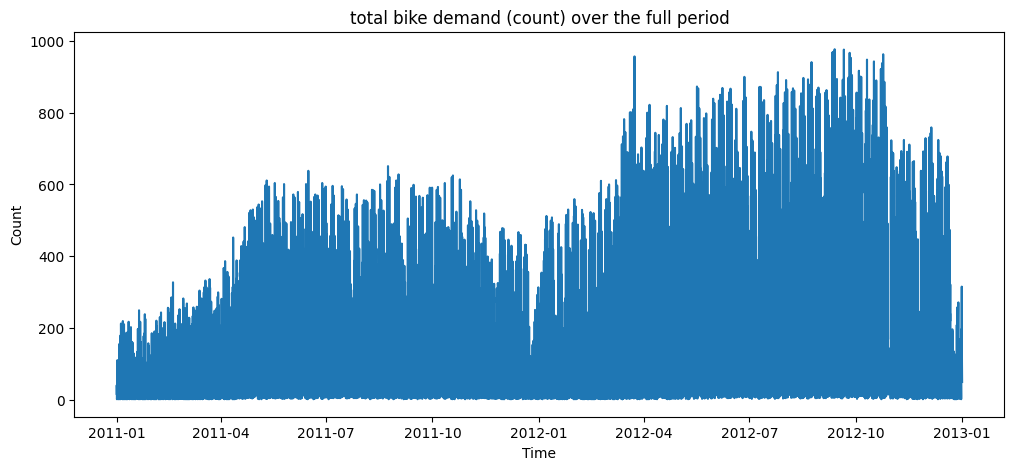

In [38]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["target"]
size = (12, 5)

plt.figure(figsize=size)
plt.plot(x, y)
plt.title("total bike demand (count) over the full period")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

Plot distributions of key numeric variables

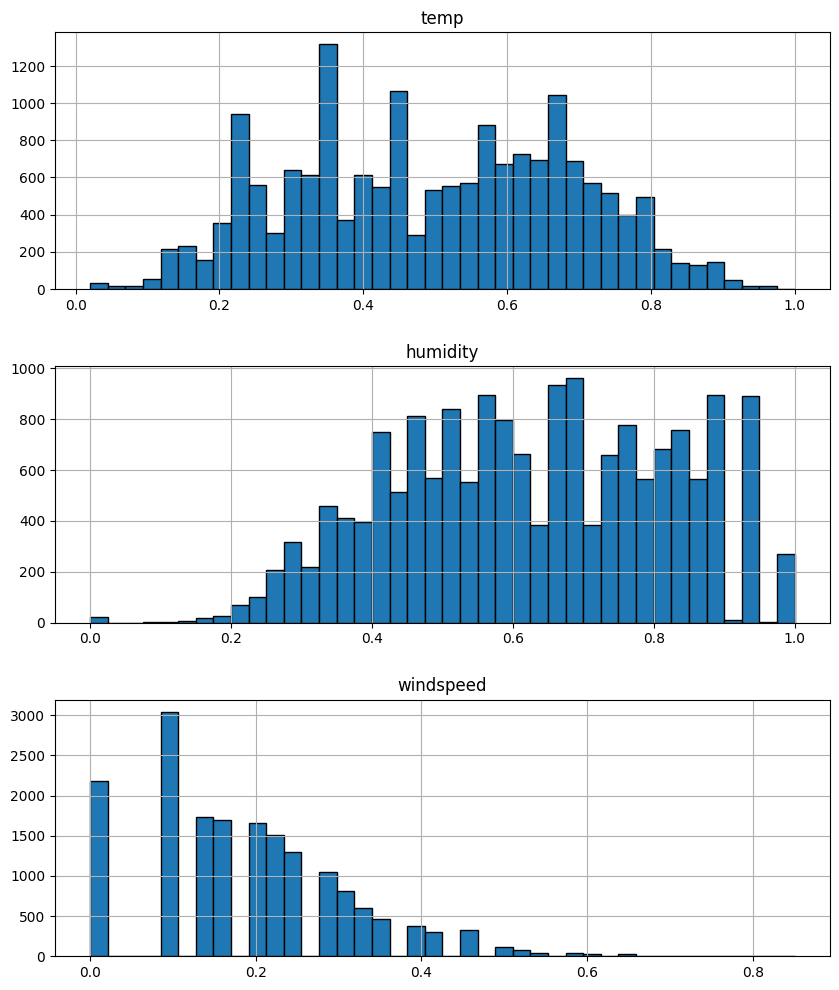

In [39]:
df[["temp", "humidity", "windspeed"]].hist(
    bins=40,
    layout=(3, 1),
    figsize=(10, 12),
    edgecolor='black'
)
plt.show()

Plot aggregated demand by season, day of week or hour of day

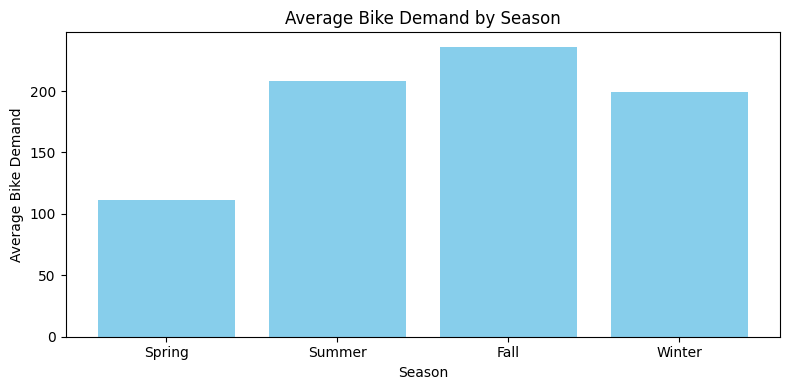

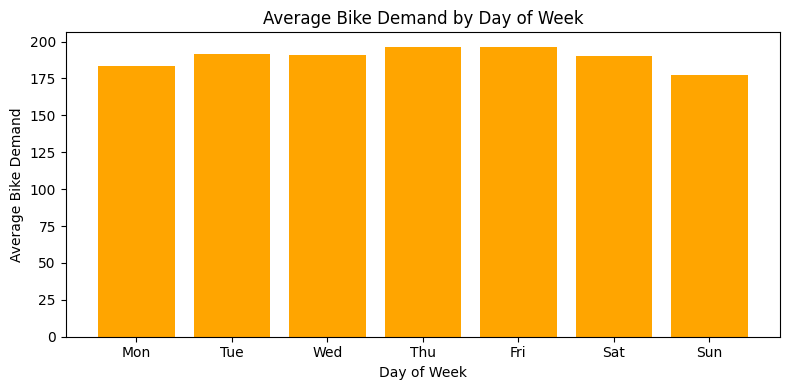

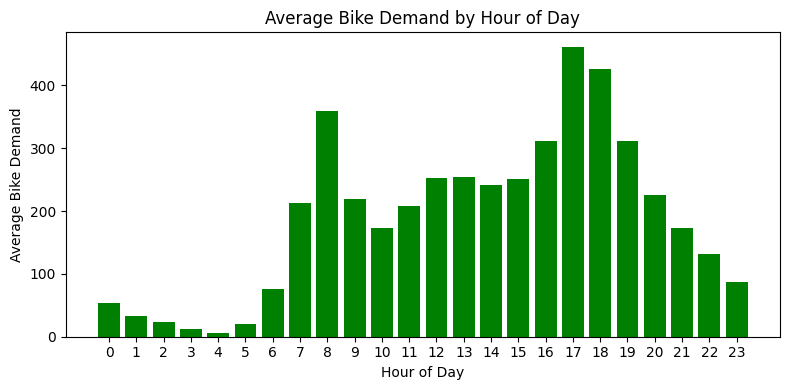

In [40]:

df_cpy = df.copy()

# Per Season
season_demand = df.groupby("season")["target"].mean()

plt.figure(figsize=(8, 4))
plt.bar(season_demand.index, season_demand.values, color="skyblue")
plt.xlabel("Season")
plt.ylabel("Average Bike Demand")
plt.title("Average Bike Demand by Season")
plt.xticks(season_demand.index, ["Spring", "Summer", "Fall", "Winter"])
plt.tight_layout()
plt.show()

# Per Day of Week
df_cpy["weekday"] = df["datetime"].dt.dayofweek  # 0 = Montag, 6 = Sonntag
weekday_demand = df_cpy.groupby("weekday")["target"].mean()

plt.figure(figsize=(8, 4))
plt.bar(weekday_demand.index, weekday_demand.values, color="orange")
plt.xlabel("Day of Week")
plt.ylabel("Average Bike Demand")
plt.title("Average Bike Demand by Day of Week")
plt.xticks(weekday_demand.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()

# Per Hour of Day
df_cpy["hour"] = df["datetime"].dt.hour
hourly_demand = df_cpy.groupby("hour")["target"].mean() 

plt.figure(figsize=(8, 4))
plt.bar(hourly_demand.index, hourly_demand.values, color="green")
plt.xlabel("Hour of Day")
plt.ylabel("Average Bike Demand")
plt.title("Average Bike Demand by Hour of Day")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Description
Demand shows clear seasonal and daily patterns.
Fall has the highest demand, while spring has the lowest demand.
Demand is very similar across all days of the week, with no strong differences.
Demand is lowest at night and rises to a first peak around 8 o’clock, decreasing slightly during midday, and reaching a second peak around 17 o’clock.
After this second peak, demand drops sharply until late in the evening.

# Task 2: Predict Demand from Conditions

## Supervised Regression Setup
Goal: Build a supervised regression model that predicts bike demand
count from given conditions (features such as weather, temperature,
time of day).

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Features und Target definieren
features = ["season", "is_holiday", "is_workingday", "weather", "temp", "humidity", "windspeed"]
target = "target"

X = df[features]
y = df[target]

#Trainings-, Validation- and Test-Splitting (70%/10%/20%)
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=0.125, random_state=42)

## Train Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Preprocessing
categorical_features = ["season", "is_holiday", "is_workingday", "weather"]
numeric_features = ["temp", "humidity", "windspeed"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features) # drop for avoiding dummy variable trap
    ]
)

# Normalization
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
X_val_proc = preprocessor.transform(X_val)

# Building model

shape_input = X_train_proc.shape[1]
model = Sequential([
    layers.Input(shape=(shape_input,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

LEARNING_RATE = 1e-3
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss="mse",
    metrics=["mae"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

EPOCHS = 300
BATCH_SIZE = 64
history = model.fit(
    X_train_proc,
    y_train,
    validation_data = (X_val_proc, y_val),
    callbacks=[early_stop],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52308.4453 - mae: 158.5178 - val_loss: 24860.8340 - val_mae: 117.3519
Epoch 2/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25144.0039 - mae: 118.9314 - val_loss: 23765.3965 - val_mae: 116.0572
Epoch 3/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24358.0059 - mae: 116.0862 - val_loss: 23293.9766 - val_mae: 112.9437
Epoch 4/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24046.4336 - mae: 115.0104 - val_loss: 23124.8086 - val_mae: 112.4104
Epoch 5/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23876.7109 - mae: 114.6215 - val_loss: 23022.8086 - val_mae: 112.8450
Epoch 6/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23761.1855 - mae: 114.3360 - val_loss: 22912.2305 - val_mae: 111.9578
Epoch 7/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23671.1777 - mae: 113.8240 - val_loss: 22884.8398 - val_mae: 112.8056
Epoch 8/300
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23616.5312 - mae: 114.

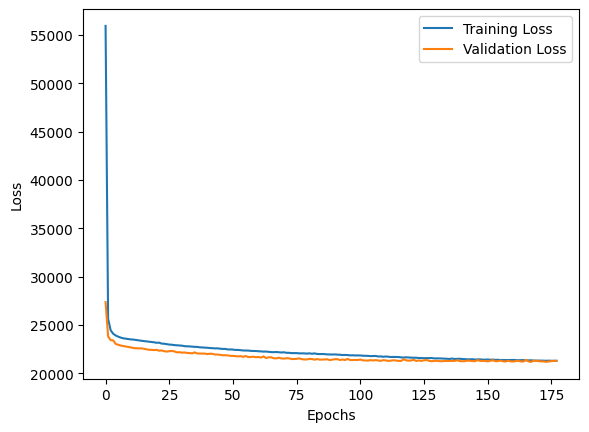

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
Test RMSE: 143.87641859639473
Test MAE: 104.66320037841797
Test R2: 0.34627652168273926


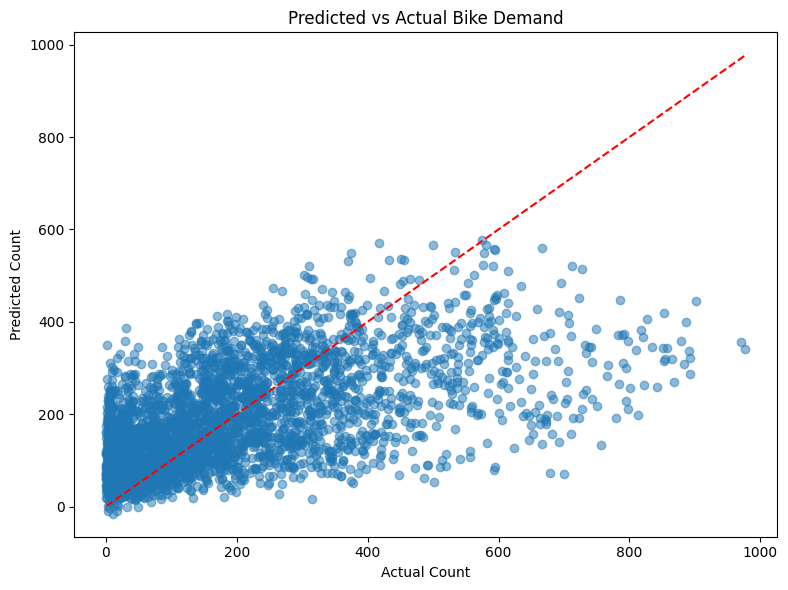

In [44]:
y_test_pred = model.predict(X_test_proc).flatten()

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)
print("Test R2:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Predicted vs Actual Bike Demand")
plt.tight_layout()
plt.show()

## User Prediction

In [47]:
def predict_bike_demand(
    season,
    is_holiday,
    is_workingday,
    weather,
    temp,
    humidity,
    windspeed
):
    """
    Predict bike demand for a single scenario.
    """

    # Create input DataFrame (must match training features exactly)
    input_df = pd.DataFrame([{
        "season": season,
        "is_holiday": is_holiday,
        "is_workingday": is_workingday,
        "weather": weather,
        "temp": temp,
        "humidity": humidity,
        "windspeed": windspeed
    }])

    # Apply preprocessing
    X_proc = preprocessor.transform(input_df)

    # Predict
    prediction = model.predict(X_proc, verbose=0)
    potential_result = int(prediction[0][0])

    return max(potential_result, 0)

In [54]:
pred1 = predict_bike_demand(
    season=3,        # fall
    is_holiday=0,
    is_workingday=1,
    weather=1,       # clear
    temp=18,
    humidity=55,
    windspeed=10
)
print("Prediction 1:", pred1)

pred2 = predict_bike_demand(
    season=4,        # winter
    is_holiday=0,
    is_workingday=0,
    weather=3,       # rain/snow
    temp=2,
    humidity=85,
    windspeed=20
)
print("Prediction 2:", pred2)

pred3 = predict_bike_demand(
    season=2,        # summer
    is_holiday=0,
    is_workingday=1,
    weather=1,       # clear
    temp=26,
    humidity=40,
    windspeed=7
)
print("Prediction 3:", pred3)

Prediction 1: 1738
Prediction 2: 0
Prediction 3: 4618


# Task 3: 30-Day Forecast

## Time-Series Pipeline
Goal: Build a time-series model that forecasts bike demand for the next 30 days (or 30 time steps), following the forecasting pipeline from the lecture.

In [55]:
# ===============================
# Feature Engineering
# ===============================
X_feat = np.concatenate([
    np.arange(len(df)).reshape(-1, 1),  # time trend
    df["datetime"].dt.dayofweek.values.reshape(-1, 1),  # day of week (0–6)
    df["datetime"].dt.month.values.reshape(-1, 1),  # month (1–12)
    df["datetime"].dt.dayofyear.values.reshape(-1, 1),  # day of year (1–365)
    (df["datetime"].dt.dayofweek >= 5).astype(int).values.reshape(-1, 1)  # weekend flag
], axis=1)

## Forecasting Model and Metrics

In [90]:
# ===============================
# Sliding Windows
# ===============================
WINDOW = 30
def make_windows(X, y, w):
    return (
        np.array([X[i:i + w] for i in range(len(X) - w)]),
        np.array([y[i + w] for i in range(len(y) - w)])
    )
X_window, y_window = make_windows(X=X_feat, y=y, w=WINDOW)

In [92]:
# ===============================
# Train / Validation / Test Split
# ===============================

n = len(X_window)
train_percent = 0.7
val_percent = 0.15

train_end = int(train_percent * n)
val_end   = int((train_percent + val_percent) * n)

X_train = X_window[:train_end]
y_train = y_window[:train_end]

X_val   = X_window[train_end:val_end]
y_val   = y_window[train_end:val_end]

X_test  = X_window[val_end:]
y_test  = y_window[val_end:]

In [93]:
# ===============================
# Normalization
# ===============================

# Normalize inputs using training data only
X_mean = X_train.mean((0, 1), keepdims=True)
X_std = X_train.std((0, 1), keepdims=True) + 1e-8

X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Normalize target values
y_mean = y_train.mean()
y_std = y_train.std() + 1e-8

y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [94]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

# ===============================
# Model
# ===============================

model = keras.Sequential([
    keras.layers.Input((WINDOW, X_train.shape[2])),
    keras.layers.LSTM(64),
    keras.layers.Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.8520 - mae: 0.7037 - val_loss: 1.8845 - val_mae: 1.0630
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6079 - mae: 0.5719 - val_loss: 1.2793 - val_mae: 0.8183
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4442 - mae: 0.4755 - val_loss: 1.0929 - val_mae: 0.7090
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3857 - mae: 0.4311 - val_loss: 0.9257 - val_mae: 0.6556
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3528 - mae: 0.4073 - val_loss: 0.9270 - val_mae: 0.6271
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3088 - mae: 0.3758 - val_loss: 0.7933 - val_mae: 0.6135
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2853 - mae: 0.3617 - val_loss: 0.7854 - val_mae: 0.5953
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2668 - mae: 0.3469 - val_loss: 0.8623 - val_mae: 0.6056
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━

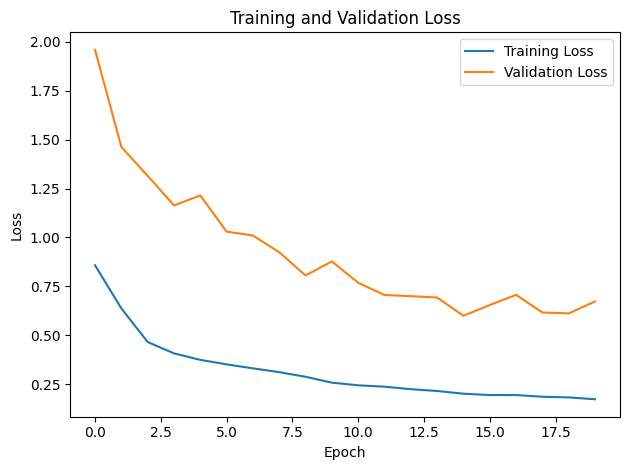

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.tight_layout()
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

Test RMSE: 157.54576708129167
Test MAE: 107.30172089624284
Test R2: 0.4588079784581198


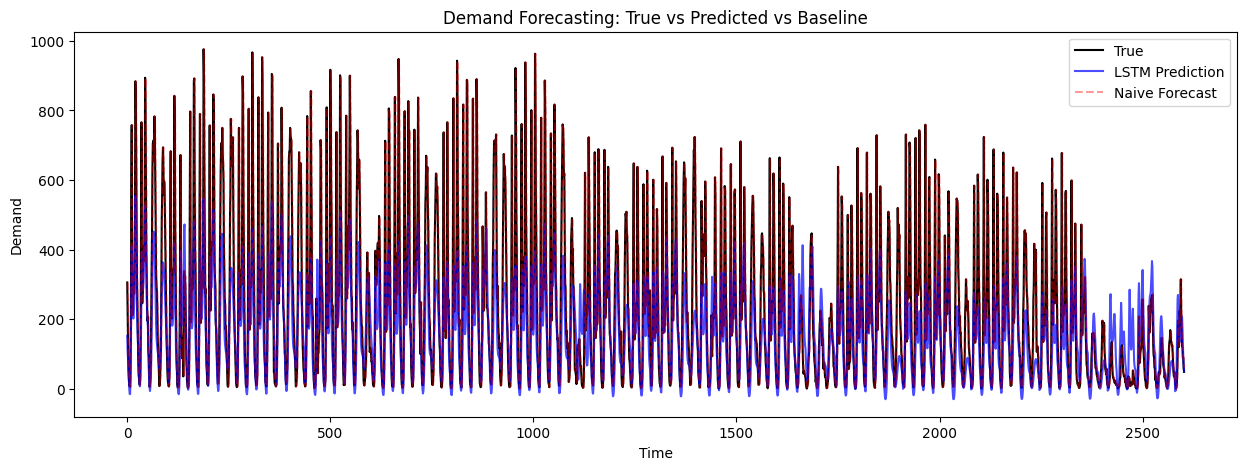

In [86]:
# ===============================
# Evaluation & Visualization
# ===============================

y_pred_norm = model.predict(X_test, verbose=0)
y_pred = y_pred_norm * y_std + y_mean

y_true = y_test * y_std + y_mean

rmse_test = np.sqrt(mean_squared_error(y_true, y_pred))
mae_test = mean_absolute_error(y_true, y_pred)
r2_test = r2_score(y_true, y_pred)
print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)
print("Test R2:", r2_test)

y_naive = y_true[:-1]

plt.figure(figsize=(15,5))
plt.plot(y_true, label="True", color="black", linestyle="-")
plt.plot(y_pred, label="LSTM Prediction", color="blue", linestyle="-", alpha=0.7)
plt.plot(range(1, len(y_true)), y_naive, label="Naive Forecast", color="red", linestyle="--", alpha=0.4)
# plt.plot(y_naive, label="Naive Forecast", color="red", alpha=0.7)
plt.title("Demand Forecasting: True vs Predicted vs Baseline")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.show()

## 30-Day Forecast

In [87]:
forecast_horizon = 30
window = WINDOW

last_X = X_feat[-window:].copy()
last_datetime = df['datetime'].iloc[-1]

multi_step_preds = []

def make_features(t, dt):
    return np.array([
        t,
        dt.dayofweek,
        dt.month,
        dt.dayofyear,
        int(dt.dayofweek >= 5)
    ])

for _ in range(forecast_horizon):
    pred_norm = model.predict(last_X[None, ...], verbose=0)
    pred = max(pred_norm[0, 0] * y_std + y_mean, 0)
    multi_step_preds.append(pred)

    last_datetime += pd.Timedelta(days=1)
    new_t = last_X[-1, 0] + 1

    new_features = make_features(new_t, last_datetime)
    new_features_norm = (new_features - X_mean) / X_std
    new_features_norm = new_features_norm.reshape(1, -1)

    last_X = np.vstack([last_X[1:], new_features_norm])

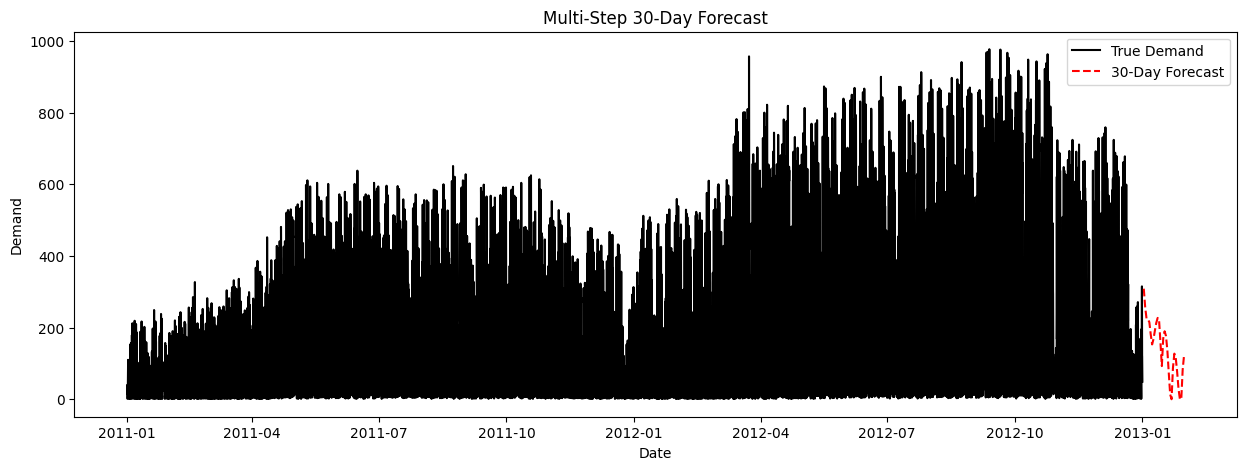

In [89]:
# For printing forecast dates
forecast_dates = pd.date_range(
    start=last_datetime - pd.Timedelta(days=forecast_horizon-1),
    periods=forecast_horizon,
    freq='D'
)

# --- Plot ---
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['target'], label="True Demand", color="black")
plt.plot(forecast_dates, multi_step_preds, label="30-Day Forecast", color="red", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Multi-Step 30-Day Forecast")
plt.legend()
plt.show()

## Interpretation

### Discuss whether the forecast captures observed patterns (e.g. seasonality, weekday/weekend effects, weather influence).

This model captures exclusively the seasonality. Influences such as weather or weekdays are not accounted for in the model. It focuses solely on the periodic behavior of demand over time.

### Compare the forecasting model to:
- The naive baseline.
    - Due to the scaling, the naive baseline practically lies exactly on the real values. Therefore, the difference to the forecasts is similar to the difference between the actual values and the forecast.
- The user-input regression model from Task 2 (when and why each is useful).
    - The model from Task 2 (M1) receives multiple input features. Therefore, predictions can be made more accurately, not only based on the time unit, as is the case with the model from Task 3 (M2). M2 can be used when the expected development over a longer period is asked for. These are representative predictions compared to the previously known development over days/years/months. However, if one wants to look at an individual case, i.e., a specific day itself, the context of the day matters. Additional influences like weather, wind speed, or weekdays are relevant. M1 is recommended in this case. M2 can provide a rough overview, M1 can check individual cases.
- Summarise the strengths and limitations of your approach in a short written conclusion.
    - The model can predict the general expected trend, but cannot incorporate additional external dependencies (such as weather or weekdays).

# Declaration of Authorship
I hereby declare that I, the undersigned, am the sole author of this submission. All sources consulted have been listed; all quotations and references have been properly cited. No version of this submission (in whole or in part) has been used previously for an academic degree or other examination.

I understand that false statements in this declaration may be punishable by law.

If ChatGPT or other LLM-based tools were used, clearly specify in the notebook:
- Which tool(s) were used (e.g. ChatGPT, Copilot)
- For what purpose (e.g. syntax help, explanation, debugging)
- Which sections or cells were influenced

## Usage of Tools
- We used ChatGPT for syntax, help, explanations, and debugging (for the code).
- We used ChatGPT to translate our own written answers into English.
- We used the tools provided by Visual Studio (autocomplete).